<a href="https://colab.research.google.com/github/Samriddhi0214/sentiment_analysis_tweets/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np    #data manipulation
import pandas as pd   #data manipulation
import re             #text processing
import nltk           #text processing
import matplotlib.pyplot as plt     #data visualization
%matplotlib inline
#display plots created using Matplotlib

In [ ]:
airline_tweets = pd.read_csv("/content/Tweets.csv")   #to read a CSV file "Tweets.csv" into Pandas DataFrame called "airline_tweets"

In [ ]:
airline_tweets.head()   #displays first few rows of the DataFrame "airline_tweets"

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
airline_tweets.shape  #returns the dimensions of DataFrame "air_tweets"

(14640, 15)

In [ ]:
airline_tweets.airline_sentiment.value_counts()   #counts the occurrences of each unique value in the column "airline_sentiment"
                                                    # within the DataFrame "airline_tweets".


,count
airline_sentiment,
negative,9178
neutral,3099
positive,2363


<Axes: ylabel='count'>

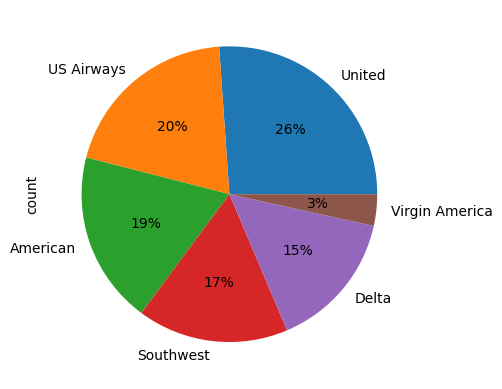

In [ ]:
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')
#generates a pie chart showing the distribution of values in the "airline" column of "airline_tweets",
#with percentages displayed on each slice.

<Axes: ylabel='count'>

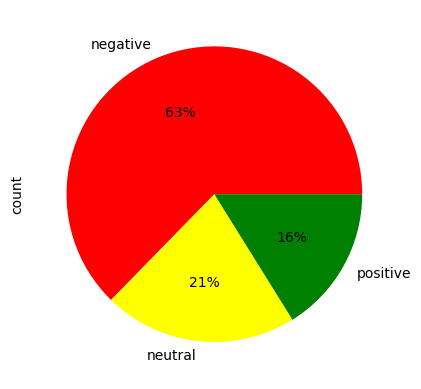

In [ ]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])
#plots a pie chart showing sentiment distribution in the "airline_sentiment" column,
#with custom colors and percentage labels



<Axes: xlabel='airline'>

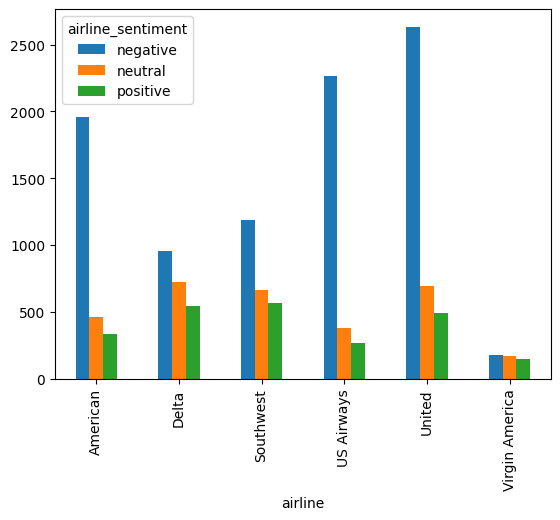

In [ ]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')
#groups the data by "airline" and "airline_sentiment", counts the occurrences,
#then creates a bar plot to visualize the sentiment distribution for each airline

<Axes: xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

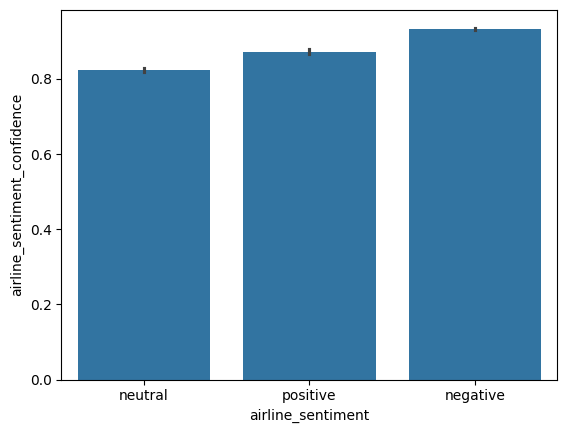

In [ ]:
import seaborn as sns

sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets)

#this code uses Seaborn to create a bar plot showing the relationship between the "airline_sentiment" and "airline_sentiment_confidence" columns.

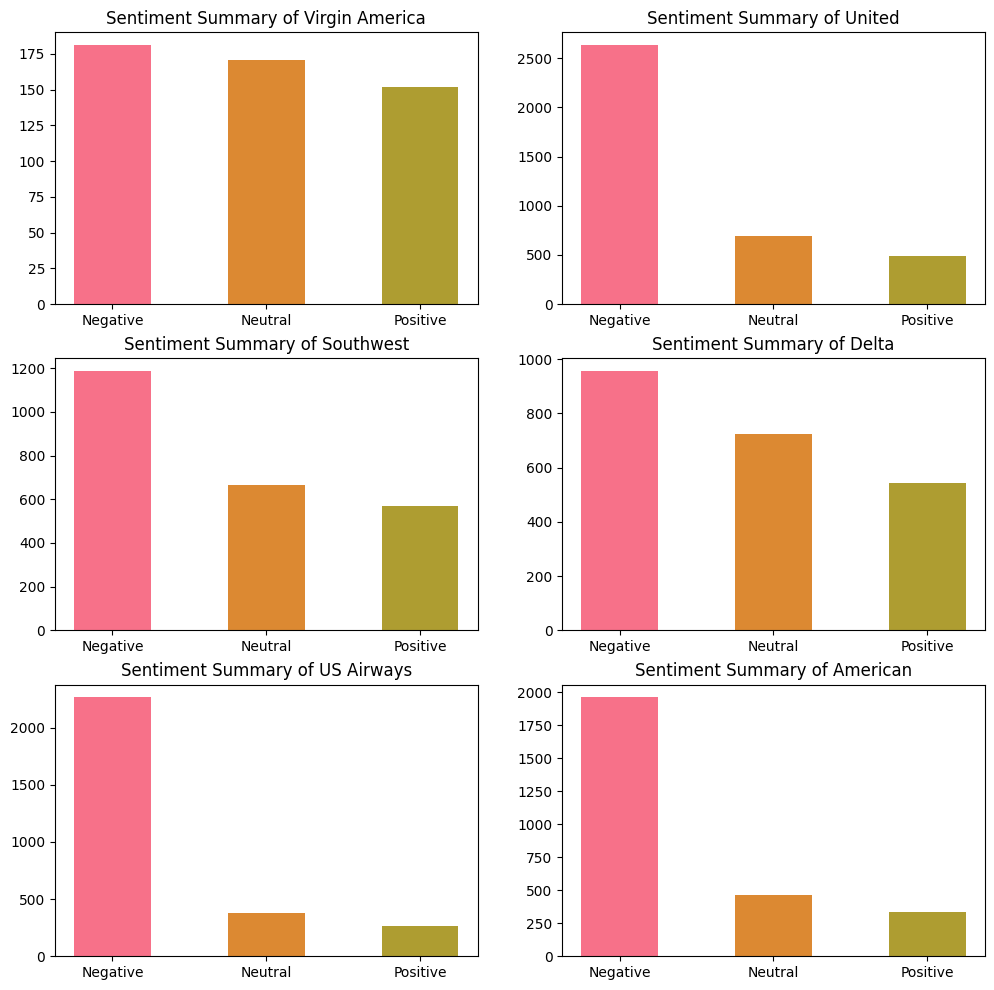

In [ ]:
def plot_sub_sentiment(Airline):
    pdf = airline_tweets[airline_tweets['airline']==Airline]
    count = pdf['airline_sentiment'].value_counts()
    Index = [1,2,3]
    color=sns.color_palette("husl", 10)
    plt.bar(Index,count,width=0.5,color=color)
    plt.xticks(Index,['Negative','Neutral','Positive'])
    plt.title('Sentiment Summary of' + " " + Airline)

airline_name = airline_tweets['airline'].unique()
plt.figure(1,figsize=(12,12))
for i in range(6):
    plt.subplot(3,2,i+1)
    plot_sub_sentiment(airline_name[i])

    #defines a function plot_sub_sentiment to plot sentiment summaries for each airline
    # then iterates through unique airline names,
    #calling the function for each
    #arranging the plots in a 3x2 grid using Matplotlib's subplot function

In [ ]:
#counting the total number of negative reasons
airline_tweets.negativereason.value_counts()

,count
negativereason,
Customer Service Issue,2910
Late Flight,1665
Can't Tell,1190
Cancelled Flight,847
Lost Luggage,724
Bad Flight,580
Flight Booking Problems,529
Flight Attendant Complaints,481
longlines,178


Text(0, 0.5, 'No. of Tweets')

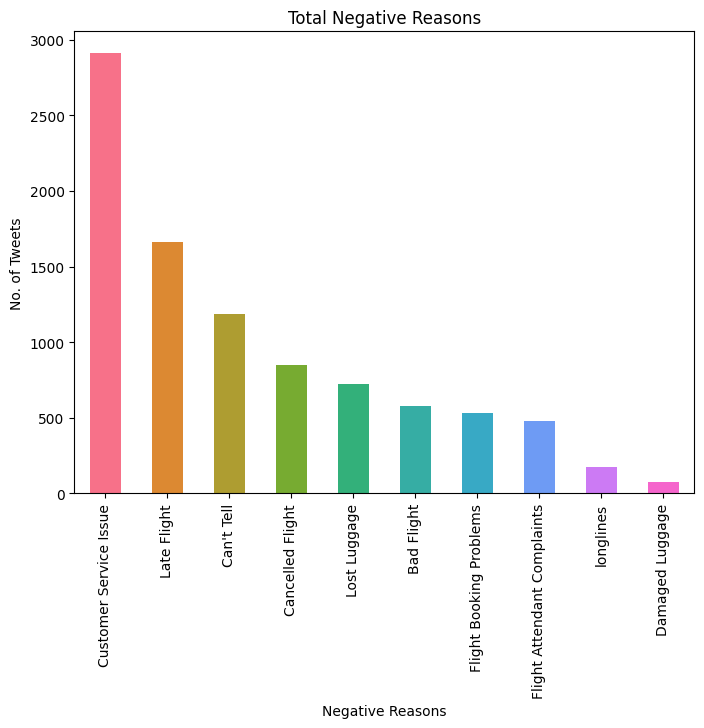

In [ ]:
#Plotting all the negative reasons
color=sns.color_palette("husl", 10)
pd.Series(airline_tweets["negativereason"]).value_counts().plot(kind = "bar",
                        color=color,figsize=(8,6),title = "Total Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

In [ ]:
from wordcloud import WordCloud,STOPWORDS
#imports the WordCloud class and the STOPWORDS set from the wordcloud library in Python.

In [ ]:
airline_tweets.head()
#displays the first few rows of the DataFrame "airline_tweets".

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
airline_tweet = airline_tweets [airline_tweets ['airline_sentiment']=='negative']
words = ' '.join(airline_tweet ['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
#code filters the DataFrame "airline_tweets" to include only rows where the "airline_sentiment" is 'negative'.

In [ ]:
airline_tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
15,570282469121007616,negative,0.6842,Late Flight,0.3684,Virgin America,NaN,smartwatermelon,NaN,0,@VirginAmerica SFO-PDX schedule is still MIA.,NaN,2015-02-24 10:01:50 -0800,"palo alto, ca",Pacific Time (US & Canada)
17,570276917301137409,negative,1.0000,Bad Flight,1.0000,Virgin America,NaN,heatherovieda,NaN,0,@VirginAmerica I flew from NYC to SFO last we...,NaN,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)


In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
#code generates a WordCloud object from the cleaned text data,
#specifying parameters such as stopwords, background color, width, and height.


In [ ]:
print(cleaned_word)
#print 'cleaned_word' that contains the cleaned text data extracted from tweets in the "airline_tweets"

it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse and it's a really big bad thing about it seriously would pay $30 a flight for seats that didn't have this playing. it's really the only bad thing about flying VA SFO-PDX schedule is still MIA. I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP! why are your first fares in May over three times more than other carriers when all seats are available to select??? you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet status match program. I applied and it's been three weeks. Called and emailed with no response. What happened 2 ur vegan food options?! At least say on ur site so i know I won't be able 2 eat anything for next 6 hrs #fail amazing to me that we can't get any cold air from the vents. #VX358 #noair #worstflightever #roasted #SFOtoBOS

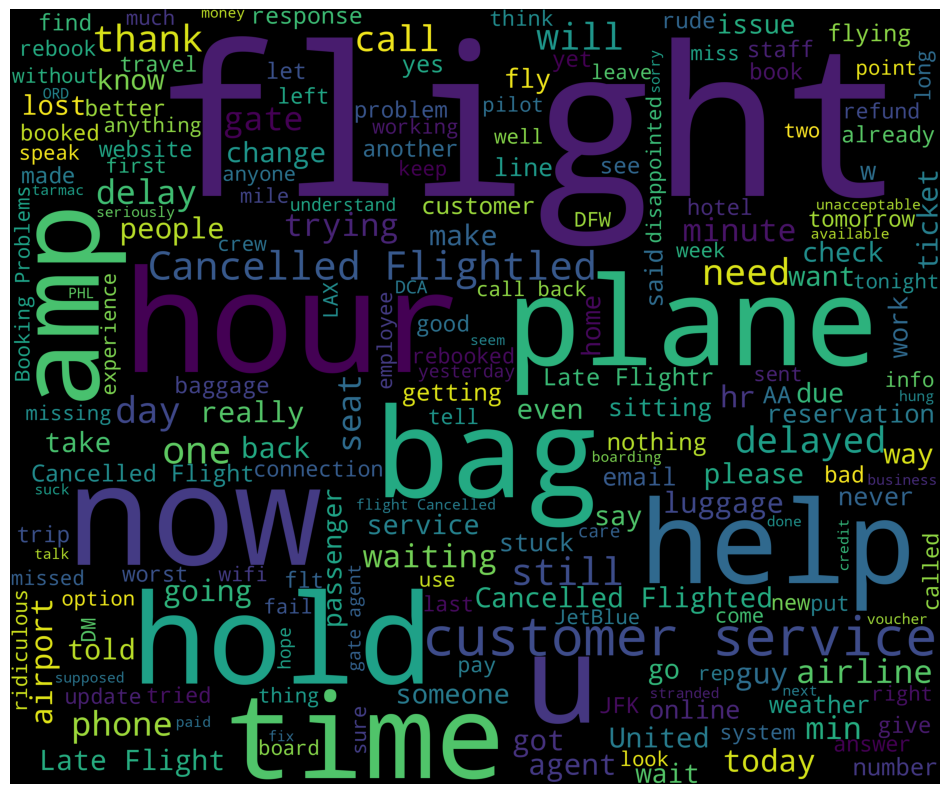

In [ ]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#displays a word cloud visualization in a 12x12 inch figure

In [ ]:
airline_tweet=airline_tweets [airline_tweets ['airline_sentiment']=='positive']
words = ' '.join(airline_tweet ['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
#filters positive airline tweets, removes unnecessary elements like URLs, mentions, and retweets,
#provides a cleaned text string ready for further analysis

In [ ]:
airline_tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)
11,570289724453216256,positive,1.0000,NaN,NaN,Virgin America,NaN,HyperCamiLax,NaN,0,@VirginAmerica I &lt;3 pretty graphics. so muc...,NaN,2015-02-24 10:30:40 -0800,NYC,America/New_York


In [ ]:
if cleaned_word:
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          width=3000,
                          height=2500
                         ).generate(cleaned_word)
# this line only creates a word cloud if there's text available after cleaning,
#preventing unnecessary computations if cleaned_word is empty.

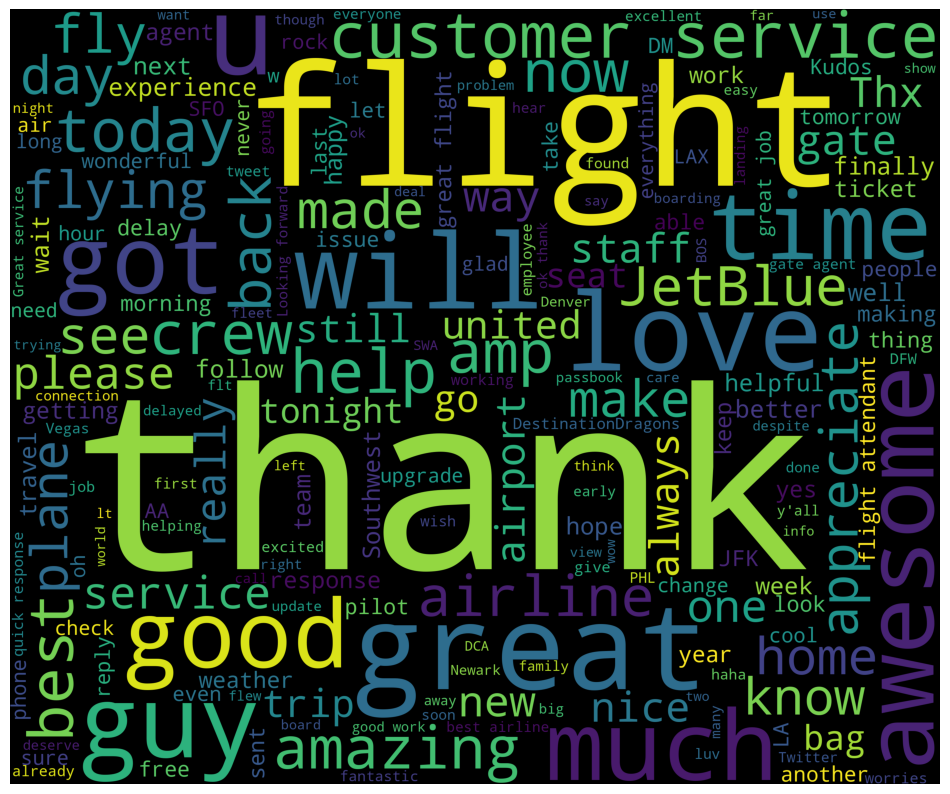

In [ ]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#displays a word cloud visualization in a 12x12 inch figure

In [ ]:
# Calculate highest frequency words in positive tweets
def freq(str):

    # break the string into list of words
    str = str.split()
    str2 = []

    # loop till string values present in list str
    for i in str:

        # checking for the duplicacy
        if i not in str2:

            # insert value in str2
            str2.append(i)

    for i in range(0, len(str2)):
        if(str.count(str2[i])>50):
            print('Frequency of', str2[i], 'is :', str.count(str2[i]))

print(freq(cleaned_word))
#finds and prints words with frequencies exceeding a certain threshold (50) in a given string

Frequency of to is : 923
Frequency of the is : 924
Frequency of time is : 59
Frequency of I is : 574
Frequency of fly is : 54
Frequency of this is : 143
Frequency of :) is : 96
Frequency of it is : 166
Frequency of was is : 226
Frequency of and is : 416
Frequency of an is : 74
Frequency of good is : 75
Frequency of so is : 163
Frequency of much is : 54
Frequency of is is : 219
Frequency of a is : 501
Frequency of great is : 144
Frequency of my is : 320
Frequency of &amp; is : 77
Frequency of on is : 327
Frequency of I'm is : 67
Frequency of flying is : 59
Frequency of your is : 212
Frequency of all is : 92
Frequency of from is : 124
Frequency of Thanks! is : 69
Frequency of for is : 658
Frequency of flight is : 263
Frequency of but is : 91
Frequency of you is : 509
Frequency of would is : 56
Frequency of be is : 135
Frequency of with is : 195
Frequency of you. is : 77
Frequency of love is : 85
Frequency of You is : 62
Frequency of are is : 120
Frequency of of is : 236
Frequency of that

In [ ]:
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values
#extracts the text data (features) and sentiment labels from the airline_tweets

In [ ]:
features

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

In [ ]:
labels

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

In [ ]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)
    #Overall, this code iterates through each tweet (sentence) in the features array,
    #performs multiple text cleaning steps using regular expressions, and
    #stores the cleaned text in a new list processed_features

In [ ]:
processed_features
#processed_features represents the cleaned text data after pre-processing

[' virginamerica what dhepburn said ',
 ' virginamerica plus you ve added commercials to the experience tacky ',
 ' virginamerica didn today must mean need to take another trip ',
 ' virginamerica it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse',
 ' virginamerica and it a really big bad thing about it',
 ' virginamerica seriously would pay 30 flight for seats that didn have this playing it really the only bad thing about flying va',
 ' virginamerica yes nearly every time fly vx this ear worm won go away ',
 ' virginamerica really missed prime opportunity for men without hats parody there https co mwpg7grezp',
 ' virginamerica well didn but now do d',
 ' virginamerica it was amazing and arrived an hour early you re too good to me ',
 ' virginamerica did you know that suicide is the second leading cause of death among teens 10 24',
 ' virginamerica lt 3 pretty graphics so much better than minimal iconography d',
 ' virginamerica th

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()
#performs TF-IDF vectorization on the pre-processed text data (processed_features)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
processed_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)
#splits the data for training and testing

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)
# creates and trains a Random Forest Classifier
#due to its robustness, ability to handle high-dimensional data (like TF-IDF features), and
#resistance to overfitting.

RandomForestClassifier(n_estimators=200, random_state=0)

In [ ]:
predictions = text_classifier.predict(X_test)
#predicts sentiment labels for the testing data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))
#effectively evaluates sentiment analysis model's performance by providing a confusion matrix
#confusion matrix compares actual labels with labels predicted by the model

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

0.7599043715846995


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
text_classifier2 = KNeighborsClassifier(n_neighbors = 5)#no. of neighbors is hpyer parameter
text_classifier2.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
predictions2 = text_classifier2.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))
print(accuracy_score(y_test, predictions2))

[[1507  309   54]
 [ 254  309   51]
 [ 118  102  224]]
              precision    recall  f1-score   support

    negative       0.80      0.81      0.80      1870
     neutral       0.43      0.50      0.46       614
    positive       0.68      0.50      0.58       444

    accuracy                           0.70      2928
   macro avg       0.64      0.60      0.62      2928
weighted avg       0.71      0.70      0.70      2928

0.6967213114754098


In [ ]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions3 = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions3))
print(classification_report(y_test,predictions3))
print(accuracy_score(y_test, predictions3))


[[1733  114   23]
 [ 271  302   41]
 [ 117   54  273]]
              precision    recall  f1-score   support

    negative       0.82      0.93      0.87      1870
     neutral       0.64      0.49      0.56       614
    positive       0.81      0.61      0.70       444

    accuracy                           0.79      2928
   macro avg       0.76      0.68      0.71      2928
weighted avg       0.78      0.79      0.78      2928

0.7882513661202186


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3= DecisionTreeClassifier(criterion="gini")
#here we are facing the problem of overfitting
#train the model
model3.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
predictions4 = model3.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions4))
print(classification_report(y_test,predictions4))
print(accuracy_score(y_test, predictions4))

[[1435  306  129]
 [ 269  283   62]
 [ 122   80  242]]
              precision    recall  f1-score   support

    negative       0.79      0.77      0.78      1870
     neutral       0.42      0.46      0.44       614
    positive       0.56      0.55      0.55       444

    accuracy                           0.67      2928
   macro avg       0.59      0.59      0.59      2928
weighted avg       0.68      0.67      0.67      2928

0.6693989071038251
